# Payment Date Prediction


### Importing related Libraries

In [ ]:
!pip install xgboost
!pip install category_encoders
!pip install fast-ml --upgrade

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing  import StandardScaler, MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Store the dataset into the Dataframe


In [ ]:
data = pd.read_csv('/content/dataset.csv')

In [ ]:
data = pd.read_csv('/content/dataset.csv')
data.shape

(50000, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [ ]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [ ]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


#### Data Cleaning

- Show top 5 records from the dataset

In [ ]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)


In [ ]:
data.isnull().sum()/len(data)*100

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [ ]:
data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - columns are almost same.




In [ ]:
data[['baseline_create_date','document_create_date','document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Column 'posting_id' is constant columns or not


In [ ]:
d1=data['posting_id']
len(d1.unique())

1

####'isOpen' is a constant column and relevant column for this project or not

In [ ]:
data['isOpen'].nunique()

2

### code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type'
- 'document_create_date.1

In [ ]:
data.drop(['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'], axis=1,inplace=True)


### Check from the dataframe whether all the columns are removed or not

In [ ]:
data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4


### Show all the Duplicate rows from the dataframe

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Display the Number of Duplicate Rows

In [ ]:
data.duplicated().sum()

1161

In [ ]:
data.shape

(50000, 12)

### Drop all the Duplicate Rows

In [ ]:
data = data.drop_duplicates(keep='first')
data.shape

(48839, 12)

In [ ]:
data.duplicated().sum()

0

### Check for the number of Rows and Columns in dataset

In [ ]:
data.shape

(48839, 12)

### Find out the total count of null values in each columns

In [ ]:
data.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion

### Checking the data type of each column of the dataframe

In [ ]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

In [ ]:
data[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date
- baseline_create_date

In [ ]:
data['clear_date']= pd.to_datetime(data['clear_date'],format = '%Y-%m-%d %H:%M:%S')
data['posting_date']= pd.to_datetime(data['posting_date'],format = '%Y-%m-%d')
data['due_in_date']= pd.to_datetime(data['due_in_date'],format = '%Y%m%d')
data['baseline_create_date']= pd.to_datetime(data['baseline_create_date'],format = '%Y%m%d')
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8


### Checking the datatype of all the columns after conversion of the above 4 columns

In [ ]:
data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

In [ ]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [ ]:
data[["total_open_amount"]]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [ ]:
data['converted_usd']=np.where( data['invoice_currency'] == 'CAD' , (data['total_open_amount']*0.7), data['total_open_amount'])
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,3187.86
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,63.48


### Display the new "converted_usd" column values

In [ ]:
data[['converted_usd']]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record

In [ ]:
data['buisness_year'] = pd.to_datetime(data['buisness_year'], format = '%Y').dt.year
data['buisness_year'].value_counts()

2019    33975
2020    14864
Name: buisness_year, dtype: int64

### Code to delete the following columns

- 'invoice_currency'
- 'total_open_amount',

In [ ]:
data.drop(['invoice_currency','total_open_amount'], axis=1, inplace=True)

### Code to check the number of columns in dataframe

In [ ]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

In [ ]:
len(data.columns)

11

# Splitting the Dataset

### Look for all columns containing null value

In [ ]:
data.isna().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Number of null values from the column from the above code

In [ ]:
data.clear_date.isna().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset )
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset )

In [ ]:
#Train data
maindata = data[data['clear_date'].notnull()].copy()

In [ ]:
#Test data
nulldata = data[data['clear_date'].isnull()].copy()

### Check the number of Rows and Columns for both the dataframes

In [ ]:
maindata.shape

(39158, 11)

In [ ]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [ ]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [ ]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

In [ ]:
maindata['delay']= (maindata.loc[:,'clear_date'] - maindata.loc[:,'due_in_date']).dt.days

In [ ]:
maindata['delay']

0         1
1        -3
2        92
4        -3
5        61
         ..
49994     0
49996     4
49997     0
49998     0
49999    -9
Name: delay, Length: 39158, dtype: int64

### Generate a new column "avgdelay" from the existing columns


In [ ]:
avgdelay=maindata.groupby('name_customer')['delay'].mean(numeric_only=False)
avgdelay

name_customer
11078 us                17.0
17135 associates       -10.0
17135 llc               -3.0
236008 associates       -3.0
99 CE                    2.0
                        ... 
YEN BROS corp            0.0
YEN BROS corporation    -0.5
YEN BROS llc            -2.0
ZARCO co                -1.0
ZIYAD  us                6.0
Name: delay, Length: 3889, dtype: float64

In [ ]:
maindata['avgdelay']=maindata['name_customer'].map(avgdelay)
maindata['avgdelay']

0        -2.702202
1        19.000000
2         8.090909
4        -2.185096
5        71.444444
           ...    
49994    -0.385417
49996    -2.472123
49997     1.047619
49998     1.567164
49999    -3.902174
Name: avgdelay, Length: 39158, dtype: float64

In [ ]:
maindata['avgdelay']=24*60*60*maindata['avgdelay']
maindata['avgdelay']

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avgdelay, Length: 39158, dtype: float64

### Display the maindata dataframe

In [ ]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0,1.354030e+05


In [ ]:
maindata.drop(['clear_date','delay'], axis=1, inplace=True)

In [ ]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39158 non-null  object        
 1   cust_number           39158 non-null  object        
 2   name_customer         39158 non-null  object        
 3   buisness_year         39158 non-null  int64         
 4   doc_id                39158 non-null  float64       
 5   posting_date          39158 non-null  datetime64[ns]
 6   due_in_date           39158 non-null  datetime64[ns]
 7   baseline_create_date  39158 non-null  datetime64[ns]
 8   cust_payment_terms    39158 non-null  object        
 9   converted_usd         39158 non-null  float64       
 10  avgdelay              39158 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(1), object(4)
memory usage: 3.6+ MB


# Splitting of Train and the Test Data

### Splitting the "maindata" columns into X and y dataframe

- y has the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [ ]:
X = maindata[set(maindata.columns) - set(['avgdelay'])]

In [ ]:
y = maindata['avgdelay']

#### Splitting both the dataframes into train and test format in 60:40 ratio

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format

In [ ]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y,test_size=0.4, train_size=0.6)

#### number of rows and columns of all the new dataframes (all 4)

In [ ]:
X_train.shape

(23494, 10)

In [ ]:
X_loc_test.shape

(15664, 10)

In [ ]:
y_train.shape

(23494,)

In [ ]:
y_loc_test.shape

(15664,)

### Splitting the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" dataframe with 50:50 format


In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5,train_size=0.5)

### check for the number of rows and columns of all the 4 dataframes

In [ ]:
X_val.shape

(7832, 10)

In [ ]:
X_test.shape

(7832, 10)

In [ ]:
y_val.shape

(7832,)

In [ ]:
y_test.shape

(7832,)

# Exploratory Data Analysis (EDA)

### Distribution Plot of the target variable

In [ ]:
sns.set_style('ticks')
sns.set(rc = {'figure.figsize':(15,6)})
sns.despine()
sns.set_context("poster")

<Figure size 1080x432 with 0 Axes>

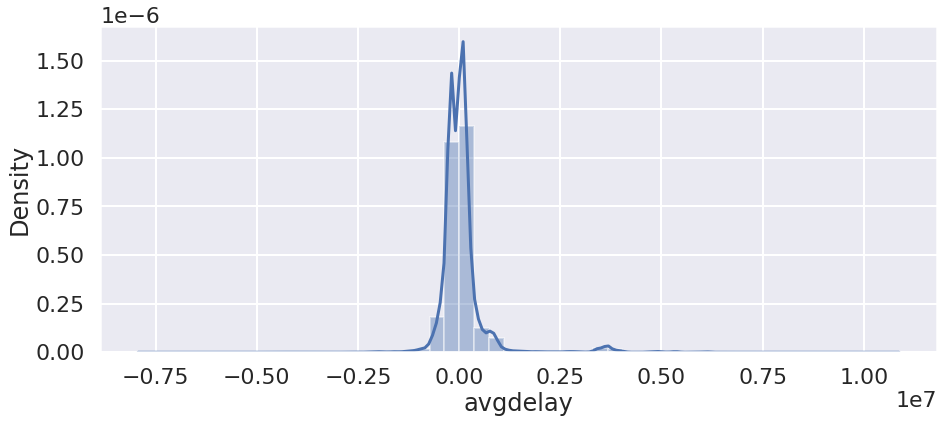

In [ ]:
Dp_avgdelay=sns.distplot(y)

### Grouping the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Storeing the outcome into a new dataframe

In [ ]:
newdata= X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
newdata

,name_customer,doc_id
0,11078 us,1
1,17135 llc,1
2,99 CE,2
3,99 CE associates,1
4,99 CE co,1
...,...,...
3060,YAEGER in,1
3061,YEN BROS,1
3062,YEN BROS corp,1
3063,ZARCO co,1


#### Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


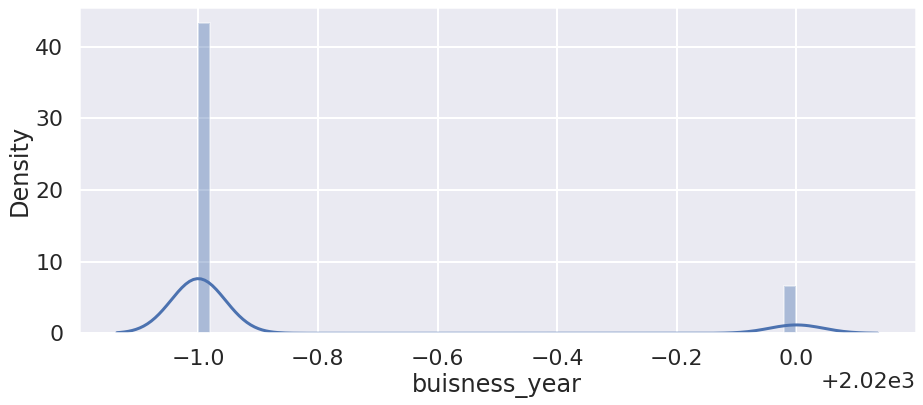

In [ ]:
sns.distplot(X_train['buisness_year'])

<function matplotlib.pyplot.show>

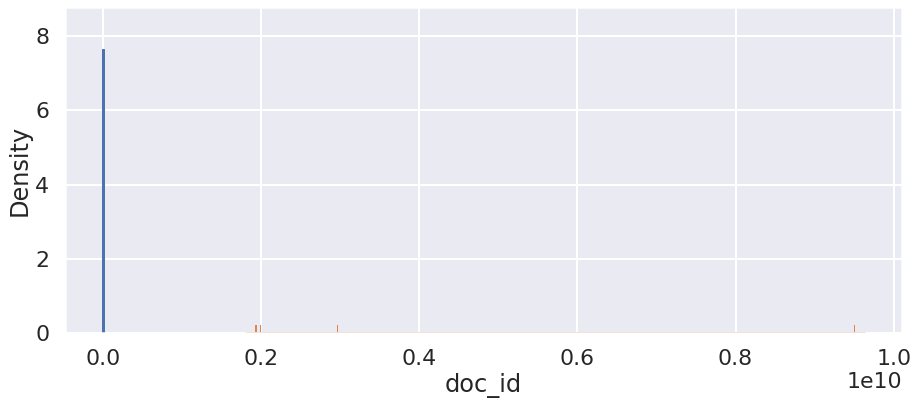

In [ ]:
sns.set_style('ticks')
sns.set(rc = {'figure.figsize':(15,6)})
sns.set_context("poster")
sns.distplot(X_train['buisness_year'],hist=False, rug = True)
sns.distplot(X_train['doc_id'],hist=False, rug = True)
plt.show

# Feature Engineering

### Display and describe the X_train dataframe

In [ ]:
X_train

,cust_number,cust_payment_terms,business_code,posting_date,buisness_year,name_customer,doc_id,baseline_create_date,converted_usd,due_in_date
46254,0200769623,NAH4,U001,2019-08-02,2019,WAL-MAR co,1.929686e+09,2019-08-02,5824.360,2019-08-17
13880,0200762301,NAC6,U001,2019-08-05,2019,C&S WH foundation,1.929705e+09,2019-08-05,343.860,2019-08-20
4855,0200726979,NAA8,U001,2019-09-19,2019,BJ'S corporation,1.929891e+09,2019-09-19,430.840,2019-10-04
4185,0140104423,CA10,CA02,2019-05-15,2019,METRO in,2.960549e+09,2019-05-15,48851.257,2019-05-25
31065,0200794332,NAAX,U001,2019-06-13,2019,COST corporation,1.929478e+09,2019-06-13,555.770,2019-06-28
...,...,...,...,...,...,...,...,...,...,...
36713,0200776463,NAA8,U001,2020-01-23,2020,KROGE corp,1.930432e+09,2020-01-23,52725.920,2020-02-07
12800,0200210681,NAD1,U001,2020-01-21,2020,HUB in,1.930406e+09,2020-01-21,14050.500,2020-02-10
34762,0200769623,NAH4,U001,2019-05-02,2019,WAL-MAR corp,1.929238e+09,2019-05-02,22080.100,2019-05-17
11259,0140104409,CA10,CA02,2019-09-28,2019,LOB associates,2.960583e+09,2019-10-07,114684.612,2019-10-17


In [ ]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132715,2.014782e+09,30680.931813
std,0.339273,3.038316e+08,36418.975988
min,2019.000000,1.928509e+09,0.790000
25%,2019.000000,1.929182e+09,4440.805000
50%,2019.000000,1.929734e+09,16814.040000
75%,2019.000000,1.930209e+09,45436.087500
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so need to perform Labelencoder on that particular column


In [ ]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### Store the value into a new column i.e. "business_code_enc"


In [ ]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [ ]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe

In [ ]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
46254,U001,1
13880,U001,1
4855,U001,1
4185,CA02,0
31065,U001,1
...,...,...
36713,U001,1
12800,U001,1
34762,U001,1
11259,CA02,0


####  a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe


In [ ]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  


In [ ]:
X_train , X_test , X_val = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.




In [ ]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


####  Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value


In [ ]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [ ]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

In [ ]:
X_train ,X_val, X_test = custom(['name_customer'])

### Usinging Label Encoder for the "cust_payment_terms" column


In [ ]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [ ]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X


In [ ]:
X_train.dtypes

cust_number                        int64
posting_date              datetime64[ns]
buisness_year                      int64
doc_id                           float64
baseline_create_date      datetime64[ns]
converted_usd                    float64
due_in_date               datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_val.dtypes

cust_number                        int64
posting_date              datetime64[ns]
buisness_year                      int64
doc_id                           float64
baseline_create_date      datetime64[ns]
converted_usd                    float64
due_in_date               datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_test.dtypes

cust_number                        int64
posting_date              datetime64[ns]
buisness_year                      int64
doc_id                           float64
baseline_create_date      datetime64[ns]
converted_usd                    float64
due_in_date               datetime64[ns]
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



In [ ]:
X_train ,X_val, X_test = custom(['posting_date'])

### Extracting Day, Month, Year for 'baseline_create_date' column

In [ ]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train,X_val,X_test = custom(['baseline_create_date'])

### Extracting day, month and year from the "due_in_date" column


In [ ]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train,X_val,X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format


In [ ]:
X_train.dtypes

cust_number                 int64
buisness_year               int64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [ ]:
X_val.dtypes

cust_number                 int64
buisness_year               int64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [ ]:
X_test.dtypes

cust_number                 int64
buisness_year               int64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method


In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [ ]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value

In [ ]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [ ]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'year_of_createdate',
 'day_of_createdate',
 'month_of_createdate',
 'year_of_due',
 'year_of_postingdate']

### Heatmap for X_train


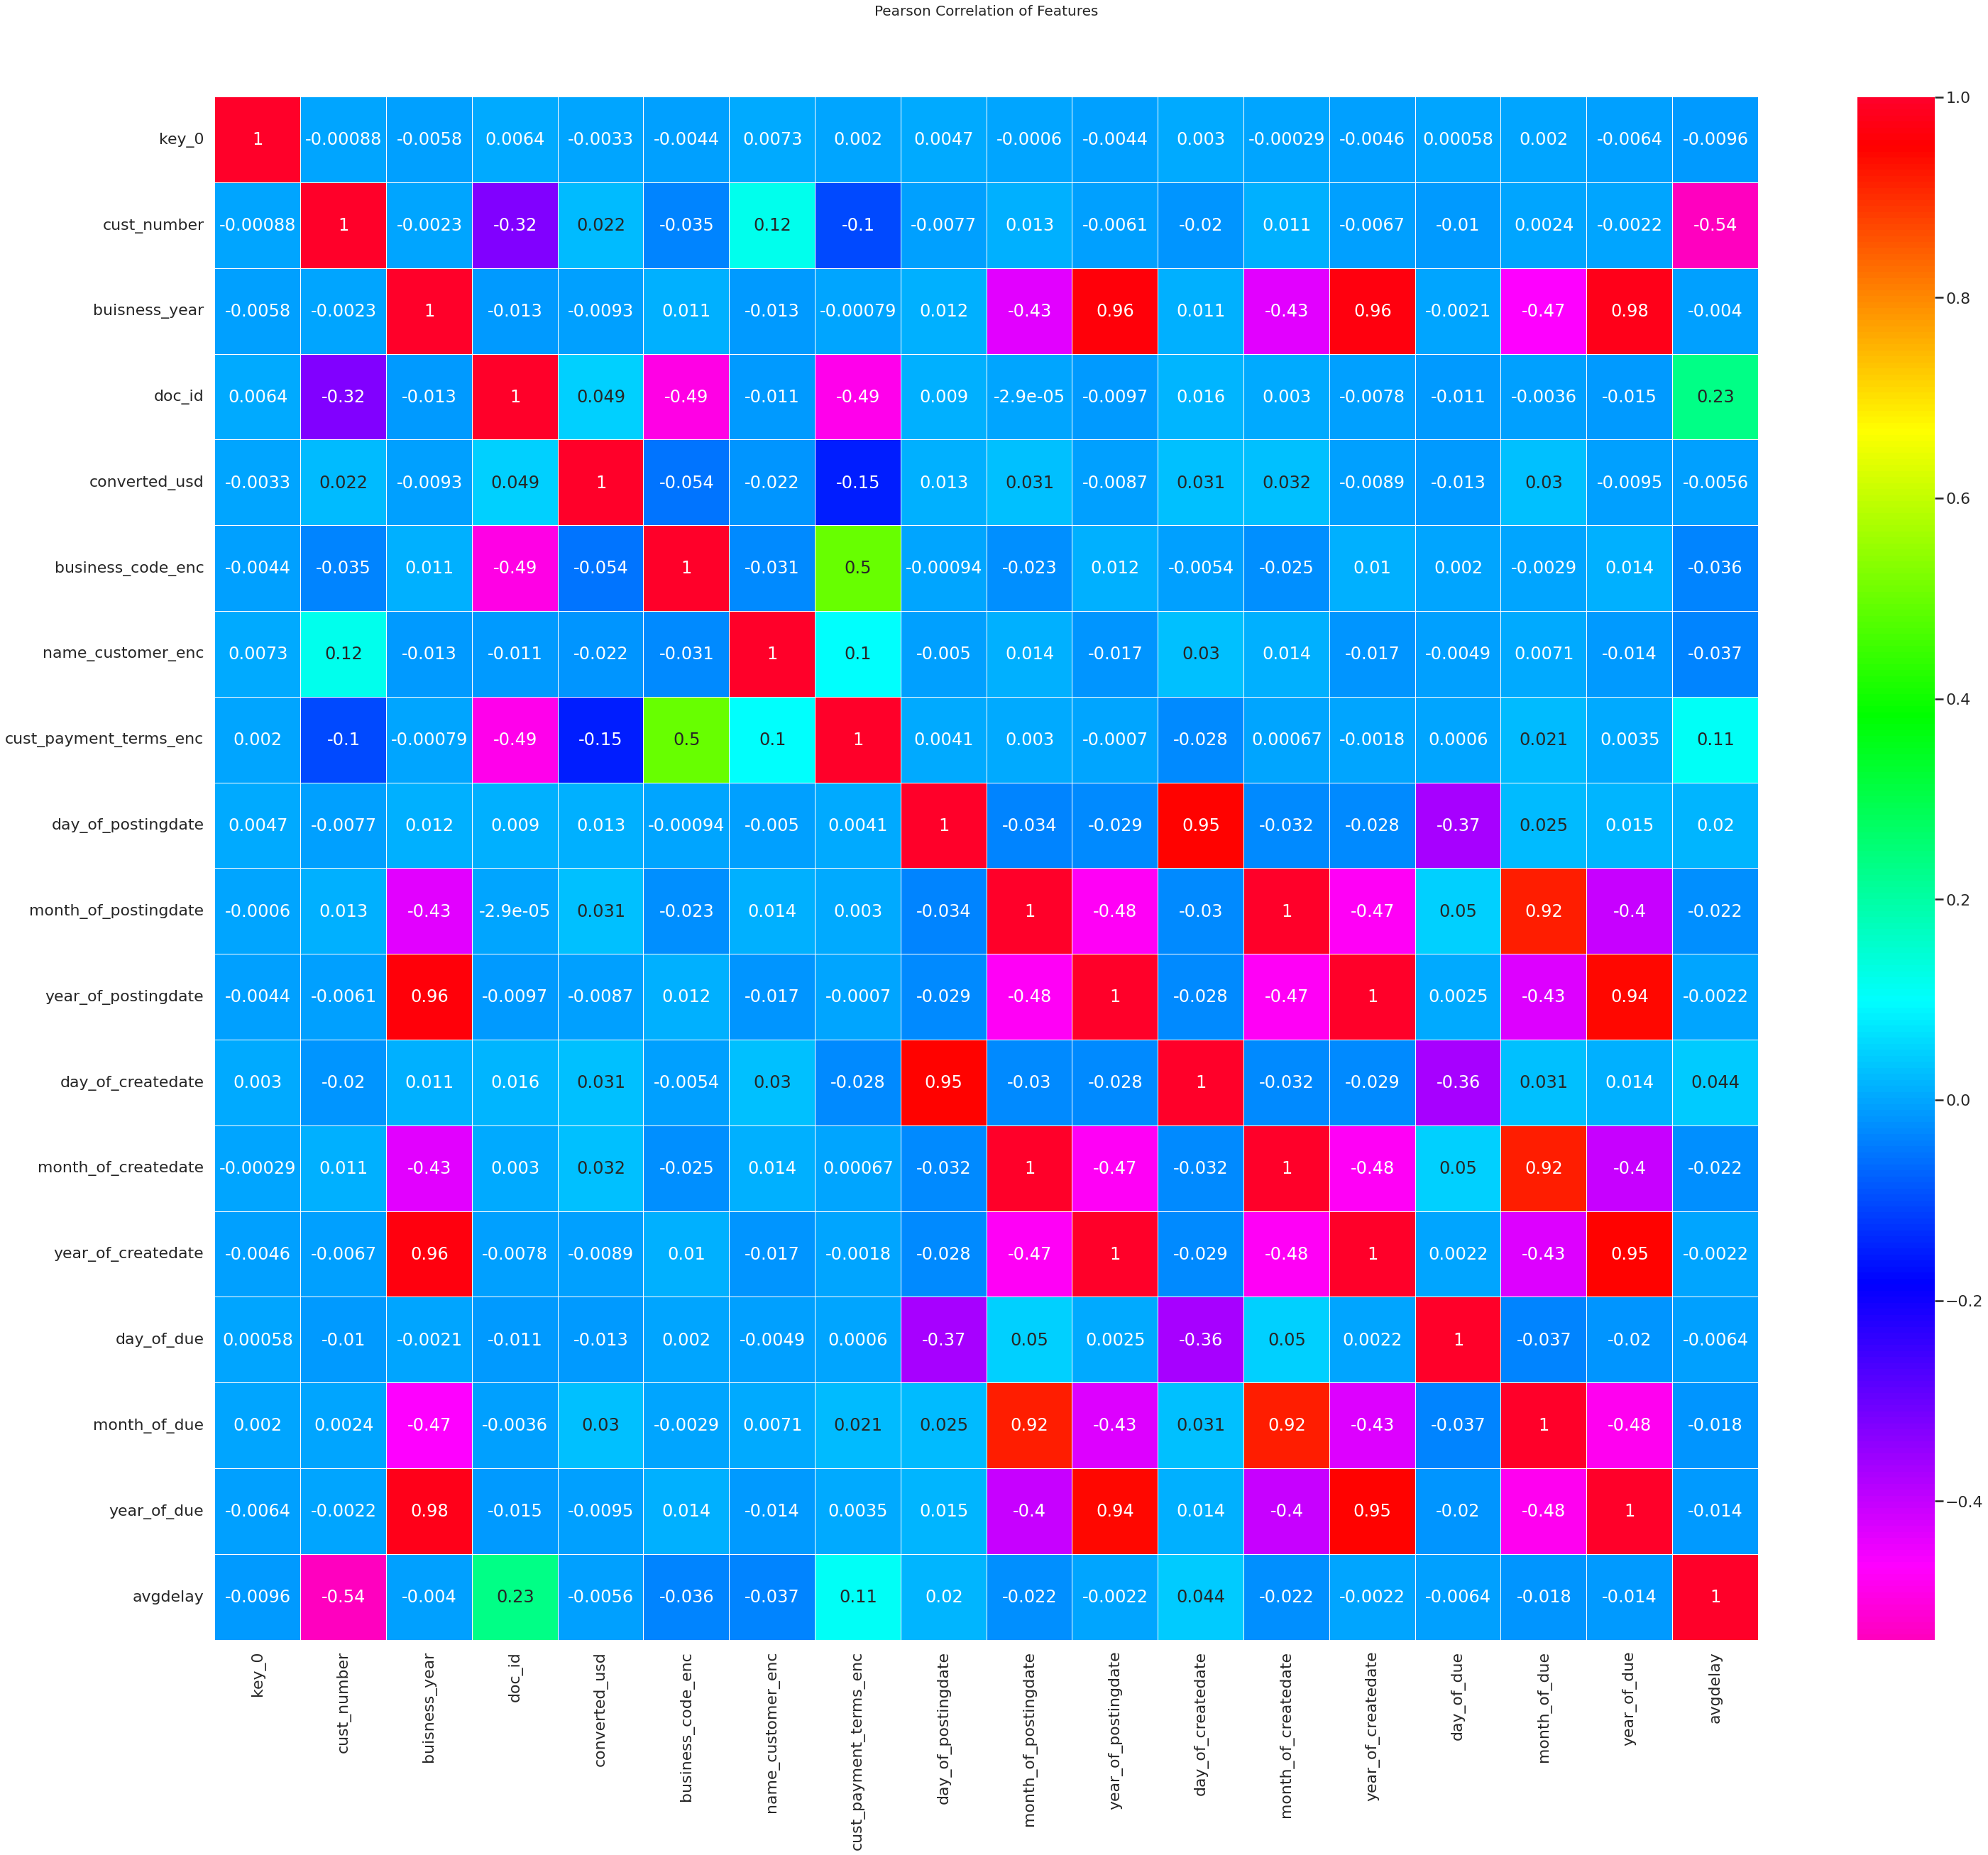

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(50,40))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_

array([1.79210875e+15, 1.15101535e-01, 9.23096867e+16, 1.32628536e+09,
       2.78095313e-01, 1.05917102e+06, 1.30055350e+02, 7.64657664e+01,
       1.23340109e+01, 1.16043685e-01, 7.81793017e+01, 1.23431238e+01,
       1.16118449e-01, 7.59737213e+01, 1.21640655e+01, 1.18681671e-01])

### Features columns are
- 'year_of_createdate'
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling

#### Comparing with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Different evaluation matrices

- MSE
- R2
- Algorithm

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [ ]:
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

554330.3809704283

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[285744826682.18555],[0.3402282649257907],

### Support Vector Regression


In [ ]:
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

667447.0250926627

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[285744826682.18555, 435717828879.06055],[0.3402282649257907, -0.00605253750418111],

### Decision Tree Regression



In [ ]:
Algorithm.append('Decision Tree Regression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

454658.4337761889

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression'],[285744826682.18555, 435717828879.06055, 271912408922.78592],[0.3402282649257907, -0.00605253750418111, 0.37216668484875537],

### Random Forest Regression



In [ ]:
Algorithm.append('Random Forest Regression')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

343892.2167031616

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression'],[285744826682.18555, 435717828879.06055, 271912408922.78592, 103482740077.314],[0.3402282649257907, -0.00605253750418111, 0.37216668484875537, 0.7610630863774815],

### XGBoost

In [ ]:
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[04:14:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

373484.87279289577

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[285744826682.18555, 435717828879.06055, 271912408922.78592, 103482740077.314, 135757240280.41978],[0.3402282649257907, -0.00605253750418111, 0.37216668484875537, 0.7610630863774815, 0.6865427416177856],

## comparison dataframe

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score',' R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.857448e+11,0.340228
1,Support Vector Regression,4.357178e+11,-0.006053
2,Decision Tree Regression,2.719124e+11,0.372167
3,Random Forest Regression,1.034827e+11,0.761063
4,XGB Regressor,1.357572e+11,0.686543


In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[04:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

368452.4939261774

In [ ]:
mean_squared_error(y_val, predict_test, squared=False)

373484.87279289577

In [ ]:
r2_score(y_test, predicted)

0.6865427416177856

In [ ]:
r2_score(y_val, predicted)

-0.6299708002634155

In [ ]:
regressorfinal.score(X_train,y_train)

0.7753723778333825

In [ ]:
regressorfinal.score(X_val,y_val)

0.6845472882118487

In [ ]:
regressorfinal.score(X_test,y_test)

0.6865427416177856

### Display the Nulldata

In [ ]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


In [ ]:
nulldata.shape

(9681, 11)

In [ ]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [ ]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   int64         
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(2), int64(1), object(4)
memory usage: 907.6+ KB


### Storing the Nulldata into a different dataset for BACKUP

In [ ]:
nulldata1 = nulldata.copy(deep=True)

In [ ]:
nulldata1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

#### Extracting day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


In [ ]:
nulldata['day_of_cleardate']=nulldata['clear_date'].dt.day
nulldata['month_of_cleardate']=nulldata['clear_date'].dt.month
nulldata['year_of_cleardate']=nulldata['clear_date'].dt.year

nulldata['day_of_postingdate']=nulldata['posting_date'].dt.day
nulldata['month_of_postingdate']=nulldata['posting_date'].dt.month
nulldata['year_of_postingdate']=nulldata['posting_date'].dt.year

nulldata['day_of_due']=nulldata['due_in_date'].dt.day
nulldata['month_of_due']=nulldata['due_in_date'].dt.month
nulldata['year_of_due']=nulldata['due_in_date'].dt.year

nulldata['day_of_createdate']=nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate']=nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate']=nulldata['baseline_create_date'].dt.year


- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [ ]:
(nulldata).dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### drop all the unnecessary columns -

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
nulldata.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], axis=1, inplace=True)

### Check the information of the "nulldata" dataframe

In [ ]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   int64  
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [ ]:
nulldata.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   int64  
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [ ]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [ ]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd', 'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc', 'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate', 'day_of_createdate', 'month_of_createdate', 'year_of_createdate', 'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [ ]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2.960623e+09,2309.79,66,2691,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1.930659e+09,11173.02,66,2776,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1.930611e+09,3525.59,66,93,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020,1.930788e+09,121105.65,66,1997,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1.930817e+09,3726.06,66,722,35,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020,1.930625e+09,13114.99,66,2979,33,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020,1.930851e+09,8899.71,66,2977,33,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020,1.930638e+09,4967.06,66,792,20,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020,1.930702e+09,1998.64,66,2736,20,25,3,2020,25,3,2020,9,4,2020


In [ ]:
final_result = regressorfinal.predict(nulldata2)

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result

0       5.613297e+05
1       4.453104e+05
2       1.000104e+06
3       1.480060e+05
4      -2.323214e+05
            ...     
9676    1.652424e+05
9677    1.652424e+05
9678   -2.129920e+05
9679    1.849466e+05
9680    3.154597e+03
Name: avg_delay, Length: 9681, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,5.613297e+05
1,7,U001,0200744019,TARG us,NaT,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,4.453104e+05
2,10,U001,0200418007,AM,NaT,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,1.000104e+06
3,14,U001,0200739534,OK systems,NaT,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,1.480060e+05
4,15,U001,0200353024,DECA corporation,NaT,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-2.323214e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,1.652424e+05
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,1.652424e+05
9678,49982,U001,0200148860,DOLLA co,NaT,2020,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-2.129920e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,1.849466e+05


In [ ]:
Final.shape

(9681, 13)

### Converting the fields back into date and time format


In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

In [ ]:
Final['clear_date']

0      2020-04-16 11:55:29.687500000
1      2020-04-08 03:41:50.406250000
2      2020-04-06 13:48:24.187500000
3      2020-05-01 17:06:46.046875000
4      2020-04-23 07:27:58.593750000
                    ...             
9676   2020-03-26 21:54:02.406250000
9677   2020-05-19 21:54:02.406250000
9678   2020-03-23 12:50:07.968750000
9679   2020-04-11 03:22:26.609375000
9680   2020-05-06 00:52:34.597167969
Name: clear_date, Length: 9681, dtype: datetime64[ns]

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [ ]:
Final['avg_delay']

0        6.0
1        5.0
2       11.0
3        1.0
4       -3.0
        ... 
9676     1.0
9677     1.0
9678    -3.0
9679     2.0
9680     0.0
Name: avg_delay, Length: 9681, dtype: float64

#### Convert average delay column into bucket


In [ ]:
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

In [ ]:
Final.drop(['key_0','avg_delay'],axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column

In [ ]:
Final['Aging Bucket'].value_counts()

0-15               8757
31-45                68
16-30                25
46-60                 4
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets

In [ ]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-16 11:55:29.687500000,2020,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0-15
1,U001,0200744019,TARG us,2020-04-08 03:41:50.406250000,2020,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-04-06 13:48:24.187500000,2020,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,0-15
3,U001,0200739534,OK systems,2020-05-01 17:06:46.046875000,2020,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-23 07:27:58.593750000,2020,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-26 21:54:02.406250000,2020,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-19 21:54:02.406250000,2020,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-23 12:50:07.968750000,2020,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-11 03:22:26.609375000,2020,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


### Store this dataframe into the .csv format

In [ ]:
Final.to_csv('HRC81548W_Nilay_Laddha')